<div style="text-align: right"> <b>데이터분석과기계학습 프로젝트(연이삭)</b></div>

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>
<span style="color:blue"><b>데이터</b></span><br>
<span style="color:blue"><b>https://data.wa.gov/Transportation/Vehicle-Registration-Transactions-by-Department-of/brw6-jymh</b></span>
<br><br>



In [2]:
vehicle = pd.read_csv('/Users/isc-yeon/Documents/projectData/Vehicle_Registration_Transactions_by_Department_of_Licensing.csv',
                      # header = 0,
                      # index_col = 'Model Year',
                      # squeeze = True,
                      nrows=10_000,
                      # usecols = [3,11],
                      low_memory=False)

vehicle.head(5)

,Transaction Month and Year,Make,Model,Model Year,Vehicle Color,Vehicle Type,Vehicle Primary Use,Fuel Type Primary,Gross Vehicle Weight Rating Class,Gross Vehicle Weight Rating Range (lbs),...,Plate Configuration,Owner Type,County,State,Postal Code,Transaction Type,Transaction Channel,Payment Type,2020 Census Tract,Transaction Count
0,January 2022,HONDA,INSIGHT,2019,NaN,PASSENGER CAR,Passenger,Gasoline,NaN,NaN,...,Standard,Individual Owner,Pierce,WA,98374,Registration Renewal,Online,Debit/Credit Card,73123.0,1
1,January 2022,MERCEDES-BENZ,GLK-CLASS,2014,WHITE,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Gasoline,1D,"5,001 - 6,000",...,Standard,Individual Owner,King,WA,98178,Registration Renewal,Online,Bank Transfer,26101.0,1
2,January 2022,MERCEDES-BENZ,M-CLASS,2002,BLUE,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Gasoline,2E,"6,001 - 7,000",...,Standard,Individual Owner,Snohomish,WA,98258,Registration Renewal,Online,Bank Transfer,52506.0,1
3,January 2022,MERCEDES-BENZ,R-CLASS,2008,WHITE,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Diesel,2E,"6,001 - 7,000",...,Standard,Individual Owner,Okanogan,WA,98862,Registration Renewal,Online,Debit/Credit Card,970900.0,1
4,January 2022,MERCURY,MOUNTAINEER,1997,GREEN,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Gasoline,1D,"5,001 - 6,000",...,Standard,Individual Owner,King,WA,98034,Registration Renewal,Online,Debit/Credit Card,22300.0,1


In [3]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Month and Year               10000 non-null  object 
 1   Make                                     10000 non-null  object 
 2   Model                                    10000 non-null  object 
 3   Model Year                               10000 non-null  int64  
 4   Vehicle Color                            6112 non-null   object 
 5   Vehicle Type                             10000 non-null  object 
 6   Vehicle Primary Use                      10000 non-null  object 
 7   Fuel Type Primary                        10000 non-null  object 
 8   Gross Vehicle Weight Rating Class        6984 non-null   object 
 9   Gross Vehicle Weight Rating Range (lbs)  6984 non-null   object 
 10  Fuel Type Secondary                      789 no

<br>
<div style="color:blue"> <b>시계열 해보려고 하고 있습니다.</b></div>
<br>

In [4]:
vehicle = pd.read_csv('/Users/isc-yeon/Documents/projectData/Vehicle_Registration_Transactions_by_Department_of_Licensing.csv',
                      # header = 0,
                      # index_col = 'Model Year',
                      # squeeze = True,
                      # nrows=10_000,
                      usecols = [3,11],
                      low_memory=False)

vehicle

,Model Year,Electrification Level
0,2019,Strong HEV (Hybrid Electric Vehicle)
1,2014,ICE (Internal Combustion Engine)
2,2002,ICE (Internal Combustion Engine)
3,2008,ICE (Internal Combustion Engine)
4,1997,ICE (Internal Combustion Engine)
...,...,...
18284632,2020,ICE (Internal Combustion Engine)
18284633,2005,ICE (Internal Combustion Engine)
18284634,2016,ICE (Internal Combustion Engine)
18284635,2011,ICE (Internal Combustion Engine)


<br>
<div style="color:blue""> <b>Electrification Level 컬럼에 있는걸 써보려고 합니다</b></div>
<br>

In [5]:
vehicle.index

RangeIndex(start=0, stop=18284637, step=1)

In [6]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18284637 entries, 0 to 18284636
Data columns (total 2 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Model Year             int64 
 1   Electrification Level  object
dtypes: int64(1), object(1)
memory usage: 279.0+ MB


In [7]:
vehicle.loc[:, 'Electrification Level'].value_counts()

ICE (Internal Combustion Engine)                 17400468
Strong HEV (Hybrid Electric Vehicle)               383784
HEV (Hybrid Electric Vehicle) - Level Unknown      245297
BEV (Battery Electric Vehicle)                     177228
PHEV (Plug-in Hybrid Electric Vehicle)              61673
Mild HEV (Hybrid Electric Vehicle)                  16186
Name: Electrification Level, dtype: int64

In [8]:
vehicle.loc[:, 'Electrification Level'].nunique()

6

In [9]:
vehicle.loc[:, 'Electrification Level'].isna().sum()

1

In [10]:
vehicle = vehicle.dropna()

In [11]:
vehicle

,Model Year,Electrification Level
0,2019,Strong HEV (Hybrid Electric Vehicle)
1,2014,ICE (Internal Combustion Engine)
2,2002,ICE (Internal Combustion Engine)
3,2008,ICE (Internal Combustion Engine)
4,1997,ICE (Internal Combustion Engine)
...,...,...
18284632,2020,ICE (Internal Combustion Engine)
18284633,2005,ICE (Internal Combustion Engine)
18284634,2016,ICE (Internal Combustion Engine)
18284635,2011,ICE (Internal Combustion Engine)


In [12]:
df = (
    vehicle
    .groupby(['Model Year', 'Electrification Level'])
    .agg(size_Electrification_Level=pd.NamedAgg(column='Electrification Level', aggfunc='size'),
        )
)
df

size_Electrification_Level
Model Year Electrification Level                                                    
1966       ICE (Internal Combustion Engine)                                        2
1979       ICE (Internal Combustion Engine)                                       10
1980       ICE (Internal Combustion Engine)                                       50
1981       BEV (Battery Electric Vehicle)                                          2
           ICE (Internal Combustion Engine)                                    13198
...                                                                              ...
2023       BEV (Battery Electric Vehicle)                                        178
           HEV (Hybrid Electric Vehicle) - Level Unknown                         923
           ICE (Internal Combustion Engine)                                     6125
           Mild HEV (Hybrid Electric Vehicle)                                    106
           PHEV (Plug-in Hybrid Electric Vehicle)                                 72

[154 rows x 1 columns]

In [13]:
df = df.reset_index()

In [14]:
df

,Model Year,Electrification Level,size_Electrification_Level
0,1966,ICE (Internal Combustion Engine),2
1,1979,ICE (Internal Combustion Engine),10
2,1980,ICE (Internal Combustion Engine),50
3,1981,BEV (Battery Electric Vehicle),2
4,1981,ICE (Internal Combustion Engine),13198
...,...,...,...
149,2023,BEV (Battery Electric Vehicle),178
150,2023,HEV (Hybrid Electric Vehicle) - Level Unknown,923
151,2023,ICE (Internal Combustion Engine),6125
152,2023,Mild HEV (Hybrid Electric Vehicle),106


In [15]:
df.index

RangeIndex(start=0, stop=154, step=1)

<br>
<div style="color:blue"> <b>ICE (Internal Combustion Engine)를 먼저 볼려고 합니다.</b></div>
<br>

<div style="color:blue"> <b>원랜 아래 네가지도 다같이 보고싶은데 뭔가 점점 헷걸리고 잘모르겠어서 일단 한개만 보려고합니다</b></div>
<div style="color:blue"> <b>HEV (Hybrid Electric Vehicle) - Level Unknown</b></div>
<div style="color:blue"> <b>BEV (Battery Electric Vehicle)</b></div>
<div style="color:blue"> <b>PHEV (Plug-in Hybrid Electric Vehicle)</b></div>
<div style="color:blue"> <b>Mild HEV (Hybrid Electric Vehicle)</b></div>

<br><br>






In [16]:
a = df[df['Electrification Level'] != 'ICE (Internal Combustion Engine)'].index
a

Int64Index([  3,  10,  13,  15,  17,  20,  22,  24,  26,  28,
            ...
            142, 143, 144, 146, 147, 148, 149, 150, 152, 153],
           dtype='int64', length=108)

In [17]:
df.drop(a, axis='index',inplace=True)

In [18]:
df

,Model Year,Electrification Level,size_Electrification_Level
0,1966,ICE (Internal Combustion Engine),2
1,1979,ICE (Internal Combustion Engine),10
2,1980,ICE (Internal Combustion Engine),50
4,1981,ICE (Internal Combustion Engine),13198
5,1982,ICE (Internal Combustion Engine),13753
6,1983,ICE (Internal Combustion Engine),17063
7,1984,ICE (Internal Combustion Engine),25372
8,1985,ICE (Internal Combustion Engine),32180
9,1986,ICE (Internal Combustion Engine),41733
11,1987,ICE (Internal Combustion Engine),41560


In [19]:
df.index

Int64Index([  0,   1,   2,   4,   5,   6,   7,   8,   9,  11,  12,  14,  16,
             18,  19,  21,  23,  25,  27,  29,  32,  34,  37,  40,  43,  46,
             50,  54,  58,  63,  68,  73,  78,  83,  88,  94, 100, 106, 112,
            118, 123, 128, 133, 139, 145, 151],
           dtype='int64')

In [20]:
df.set_index('Model Year').index

Int64Index([1966, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
            1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
            2022, 2023],
           dtype='int64', name='Model Year')

In [21]:
df.index

Int64Index([  0,   1,   2,   4,   5,   6,   7,   8,   9,  11,  12,  14,  16,
             18,  19,  21,  23,  25,  27,  29,  32,  34,  37,  40,  43,  46,
             50,  54,  58,  63,  68,  73,  78,  83,  88,  94, 100, 106, 112,
            118, 123, 128, 133, 139, 145, 151],
           dtype='int64')

In [22]:
df = df.set_index('Model Year')
df

,Electrification Level,size_Electrification_Level
Model Year,,
1966,ICE (Internal Combustion Engine),2
1979,ICE (Internal Combustion Engine),10
1980,ICE (Internal Combustion Engine),50
1981,ICE (Internal Combustion Engine),13198
1982,ICE (Internal Combustion Engine),13753
1983,ICE (Internal Combustion Engine),17063
1984,ICE (Internal Combustion Engine),25372
1985,ICE (Internal Combustion Engine),32180
1986,ICE (Internal Combustion Engine),41733


<AxesSubplot:xlabel='Model Year'>

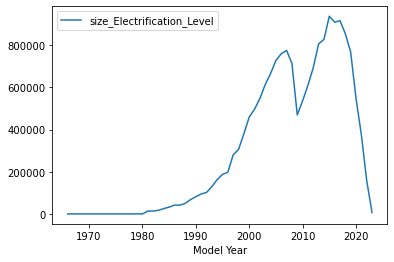

In [23]:
df.plot()

In [24]:
df = df.drop(labels='Electrification Level', axis=1)
df

,size_Electrification_Level
Model Year,
1966,2
1979,10
1980,50
1981,13198
1982,13753
1983,17063
1984,25372
1985,32180
1986,41733


<br>
<div style="color:blue"> <b>사실 여기부터는 뭔지 잘 모르고 하고 있습니다.</b></div>
<div style="color:blue"> <b>아 ARIMA라는게 있구나 라는정도만 알고 나머지는 모릅니다</b></div>
<div style="color:blue"> <b>남은 기간 동안 더 공부 해보겠습니다</b></div>


<br>

/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


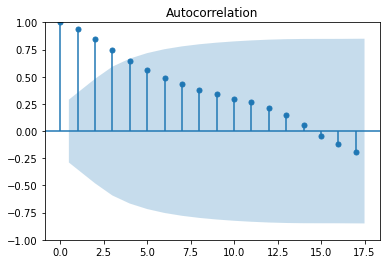

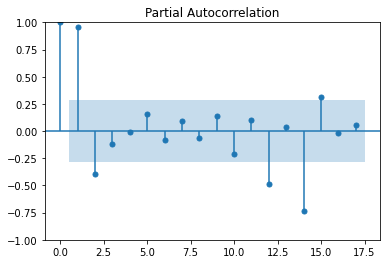

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plot_pacf(df)
plt.show()

/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


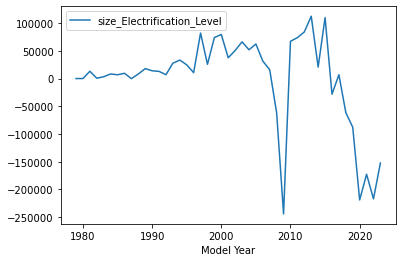

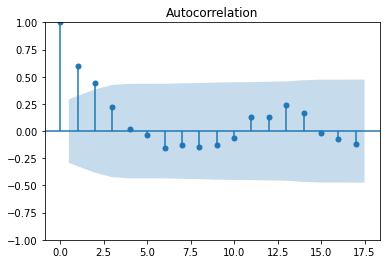

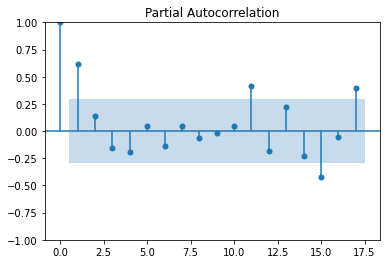

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                                   SARIMAX Results                                    
Dep. Variable:     size_Electrification_Level   No. Observations:                   46
Model:                         ARIMA(0, 1, 0)   Log Likelihood                -573.197
Date:                        Tue, 22 Nov 2022   AIC                           1148.394
Time:                                23:26:30   BIC                           1150.200
Sample:                                     0   HQIC                          1149.067
                                         - 46                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.633e+09   9.78e+08      6.779      0.000    4.72e+09    8.55e+09
Ljung-Box (L1) (Q):                  17.35   Jarque-Bera (JB):     

/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


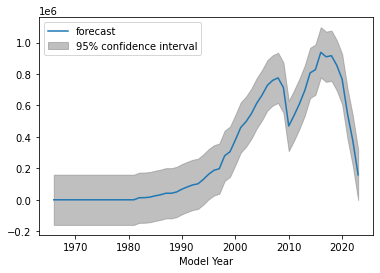

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

plot_predict(model_fit)
plt.show()

In [29]:
fore = model_fit.forecast(steps=1)
print(fore)

46    6125.0
dtype: float64


/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


---
---
---

<AxesSubplot:xlabel='Model Year'>

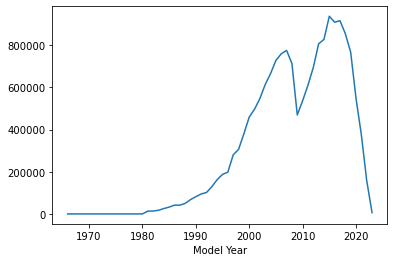

In [30]:
df.loc[:, 'size_Electrification_Level'].plot()

<AxesSubplot:xlabel='Model Year'>

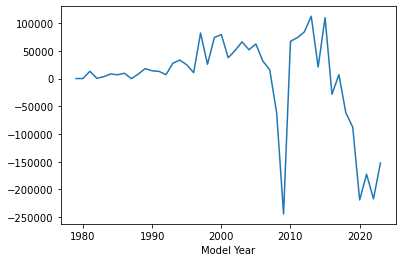

In [31]:
# 뭐지모르고쓰는코드
diff1 = df.loc[:, 'size_Electrification_Level'].diff(periods=1).iloc[1:]
diff1.plot()

(-3.6841814264071986, 0.004341239099350596, 0, 44, {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}, 29.050608461092374)
-3.6841814264071986
0.004341239099350596


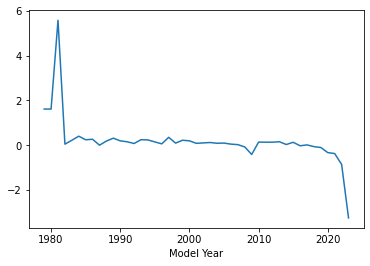

In [32]:
from statsmodels.tsa.stattools import adfuller

diff1 = np.log(df['size_Electrification_Level']).diff(periods=1).iloc[1:]
diff1.plot()
result = adfuller(diff1)
print(result)
print(result[0])
print(result[1])

In [33]:
# !pip install pmdarima

In [34]:
from pmdarima.arima import auto_arima
model = auto_arima(df['size_Electrification_Level'], suppress_warning=True)
model

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [35]:
# 학습용, 검증용 구분
n = int(df.shape[0]*.8)
train = df[:n]
test = df[n:]
print(len(df['size_Electrification_Level']))
print(train['size_Electrification_Level'].values)
print(test['size_Electrification_Level'].values)

46
[     2     10     50  13198  13753  17063  25372  32180  41733  41560
  49740  67684  81705  94656 101596 129288 162638 187405 198045 280138
 305856 379857 459300 496780 547484 613727 665647 727973 759529 775378
 713473 469350 536543 610355 694421 806809]
[827543 937473 909237 916210 854752 766971 548027 375383 158449   6125]


In [36]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['size_Electrification_Level'], order=(0,1,0)).fit()

/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
fore = model.forecast(steps=5)
print(fore)

36    806809.0
37    806809.0
38    806809.0
39    806809.0
40    806809.0
Name: predicted_mean, dtype: float64


/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [38]:
# from statsmodels.graphics.tsaplots import plot_predict
# from statsmodels.tsa.arima.model import ARIMA

In [39]:
# from statsmodels.tsa.arima.model.ARIMAResults import plot_predict

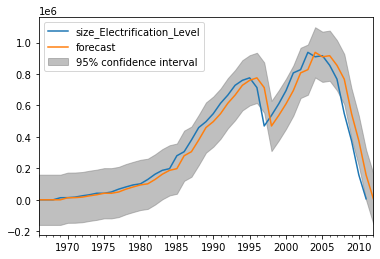

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

dta = df['size_Electrification_Level']
dta.index = pd.date_range(start='1966', end='2012', freq='A') # 시간인덱스??? 이상함 다시맞춰야됨
res = ARIMA(dta, order=(0,1,0)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1966':].plot(ax=ax)
plot_predict(res, '1966', '2012', ax=ax)
plt.show()

---
---
---

In [ ]:
######## 다시 하기 ########

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# mpl.rc('font', family='Malgun Gothic')

In [2]:
vehicle = pd.read_csv('/Users/isc-yeon/Documents/projectData/Vehicle_Registration_Transactions_by_Department_of_Licensing.csv',
                      # header = 0,
                      # index_col = 'Model Year',
                      # squeeze = True,
                      # nrows=10_000,
                      usecols = [3,11],
                      low_memory=False)

vehicle

,Model Year,Electrification Level
0,2019,Strong HEV (Hybrid Electric Vehicle)
1,2014,ICE (Internal Combustion Engine)
2,2002,ICE (Internal Combustion Engine)
3,2008,ICE (Internal Combustion Engine)
4,1997,ICE (Internal Combustion Engine)
...,...,...
18284632,2020,ICE (Internal Combustion Engine)
18284633,2005,ICE (Internal Combustion Engine)
18284634,2016,ICE (Internal Combustion Engine)
18284635,2011,ICE (Internal Combustion Engine)


In [3]:
df = (
    vehicle
    .groupby(['Model Year', 'Electrification Level'])
    .agg(size_Electrification_Level=pd.NamedAgg(column='Electrification Level', aggfunc='size'),
        )
)
df

size_Electrification_Level
Model Year Electrification Level                                                    
1966       ICE (Internal Combustion Engine)                                        2
1979       ICE (Internal Combustion Engine)                                       10
1980       ICE (Internal Combustion Engine)                                       50
1981       BEV (Battery Electric Vehicle)                                          2
           ICE (Internal Combustion Engine)                                    13198
...                                                                              ...
2023       BEV (Battery Electric Vehicle)                                        178
           HEV (Hybrid Electric Vehicle) - Level Unknown                         923
           ICE (Internal Combustion Engine)                                     6125
           Mild HEV (Hybrid Electric Vehicle)                                    106
           PHEV (Plug-in Hybrid Electric Vehicle)                                 72

[154 rows x 1 columns]

In [4]:
df = df.reset_index()

In [5]:
df

,Model Year,Electrification Level,size_Electrification_Level
0,1966,ICE (Internal Combustion Engine),2
1,1979,ICE (Internal Combustion Engine),10
2,1980,ICE (Internal Combustion Engine),50
3,1981,BEV (Battery Electric Vehicle),2
4,1981,ICE (Internal Combustion Engine),13198
...,...,...,...
149,2023,BEV (Battery Electric Vehicle),178
150,2023,HEV (Hybrid Electric Vehicle) - Level Unknown,923
151,2023,ICE (Internal Combustion Engine),6125
152,2023,Mild HEV (Hybrid Electric Vehicle),106


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Model Year                  154 non-null    int64 
 1   Electrification Level       154 non-null    object
 2   size_Electrification_Level  154 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.7+ KB


In [8]:
df['Datetime'] = pd.to_datetime(df['Model Year'], format='%Y')
df

,Model Year,Electrification Level,size_Electrification_Level,Datetime
0,1966,ICE (Internal Combustion Engine),2,1966-01-01
1,1979,ICE (Internal Combustion Engine),10,1979-01-01
2,1980,ICE (Internal Combustion Engine),50,1980-01-01
3,1981,BEV (Battery Electric Vehicle),2,1981-01-01
4,1981,ICE (Internal Combustion Engine),13198,1981-01-01
...,...,...,...,...
149,2023,BEV (Battery Electric Vehicle),178,2023-01-01
150,2023,HEV (Hybrid Electric Vehicle) - Level Unknown,923,2023-01-01
151,2023,ICE (Internal Combustion Engine),6125,2023-01-01
152,2023,Mild HEV (Hybrid Electric Vehicle),106,2023-01-01


In [9]:
df['Datetime'].describe()

/var/folders/4y/3s4dhdy90gj8rv5d13z_cp0m0000gn/T/ipykernel_12321/527077369.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Datetime'].describe()


count                     154
unique                     46
top       2013-01-01 00:00:00
freq                        6
first     1966-01-01 00:00:00
last      2023-01-01 00:00:00
Name: Datetime, dtype: object

In [10]:
df['Year'] = df['Datetime'].dt.year
df

,Model Year,Electrification Level,size_Electrification_Level,Datetime,Year
0,1966,ICE (Internal Combustion Engine),2,1966-01-01,1966
1,1979,ICE (Internal Combustion Engine),10,1979-01-01,1979
2,1980,ICE (Internal Combustion Engine),50,1980-01-01,1980
3,1981,BEV (Battery Electric Vehicle),2,1981-01-01,1981
4,1981,ICE (Internal Combustion Engine),13198,1981-01-01,1981
...,...,...,...,...,...
149,2023,BEV (Battery Electric Vehicle),178,2023-01-01,2023
150,2023,HEV (Hybrid Electric Vehicle) - Level Unknown,923,2023-01-01,2023
151,2023,ICE (Internal Combustion Engine),6125,2023-01-01,2023
152,2023,Mild HEV (Hybrid Electric Vehicle),106,2023-01-01,2023


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Model Year                  154 non-null    int64         
 1   Electrification Level       154 non-null    object        
 2   size_Electrification_Level  154 non-null    int64         
 3   Datetime                    154 non-null    datetime64[ns]
 4   Year                        154 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.1+ KB


In [12]:
df

,Model Year,Electrification Level,size_Electrification_Level,Datetime,Year
0,1966,ICE (Internal Combustion Engine),2,1966-01-01,1966
1,1979,ICE (Internal Combustion Engine),10,1979-01-01,1979
2,1980,ICE (Internal Combustion Engine),50,1980-01-01,1980
3,1981,BEV (Battery Electric Vehicle),2,1981-01-01,1981
4,1981,ICE (Internal Combustion Engine),13198,1981-01-01,1981
...,...,...,...,...,...
149,2023,BEV (Battery Electric Vehicle),178,2023-01-01,2023
150,2023,HEV (Hybrid Electric Vehicle) - Level Unknown,923,2023-01-01,2023
151,2023,ICE (Internal Combustion Engine),6125,2023-01-01,2023
152,2023,Mild HEV (Hybrid Electric Vehicle),106,2023-01-01,2023


In [14]:
ICE = df[df['Electrification Level'] != 'ICE (Internal Combustion Engine)'].index
ICE

Int64Index([  3,  10,  13,  15,  17,  20,  22,  24,  26,  28,
            ...
            142, 143, 144, 146, 147, 148, 149, 150, 152, 153],
           dtype='int64', length=108)

In [15]:
df_ICE = df.drop(ICE)
df_ICE

,Model Year,Electrification Level,size_Electrification_Level,Datetime,Year
0,1966,ICE (Internal Combustion Engine),2,1966-01-01,1966
1,1979,ICE (Internal Combustion Engine),10,1979-01-01,1979
2,1980,ICE (Internal Combustion Engine),50,1980-01-01,1980
4,1981,ICE (Internal Combustion Engine),13198,1981-01-01,1981
5,1982,ICE (Internal Combustion Engine),13753,1982-01-01,1982
6,1983,ICE (Internal Combustion Engine),17063,1983-01-01,1983
7,1984,ICE (Internal Combustion Engine),25372,1984-01-01,1984
8,1985,ICE (Internal Combustion Engine),32180,1985-01-01,1985
9,1986,ICE (Internal Combustion Engine),41733,1986-01-01,1986
11,1987,ICE (Internal Combustion Engine),41560,1987-01-01,1987


<AxesSubplot:xlabel='Model Year', ylabel='size_Electrification_Level'>

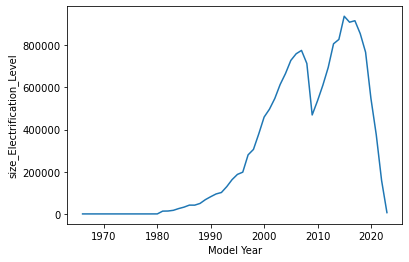

In [16]:
sns.lineplot(data=df_ICE, x=df_ICE['Model Year'], y=df_ICE['size_Electrification_Level'])

<AxesSubplot:xlabel='Year', ylabel='size_Electrification_Level'>

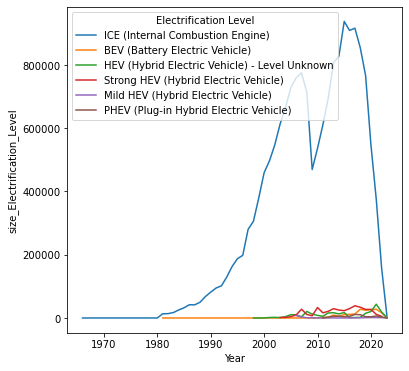

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(data=df, x='Year', y='size_Electrification_Level', hue='Electrification Level')

**ARIMA (Auto Regressive Integrated Moving Average Model)**

* AR (Auto Regressive Model) : 자기회귀모델
    - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
    - ACF(Auto Correlation Function) : 자기상관함수 / 특정 구간내 데이터간 상관관계
    - PACF : 부분자기상관함수
    
* MA (Moving Average Model) : 이동평균모델
    - 일정한 구간 데이터의 평균으리 계산해, 미래를 예측하는 모델

* Diffenence 차분

**ARIMA Model**

- 단기예측에 적합
- 계절적 변동요인 (주기적 변동)
- Sample > 50
- 정석적자료
    -> 차분

In [31]:
import statsmodels.tsa.api as tsa

In [41]:
df_ICE.head()

,Model Year,Electrification Level,size_Electrification_Level,Datetime,Year
0,1966,ICE (Internal Combustion Engine),2,1966-01-01,1966
1,1979,ICE (Internal Combustion Engine),10,1979-01-01,1979
2,1980,ICE (Internal Combustion Engine),50,1980-01-01,1980
4,1981,ICE (Internal Combustion Engine),13198,1981-01-01,1981
5,1982,ICE (Internal Combustion Engine),13753,1982-01-01,1982


In [56]:
df_time= pd.pivot_table(data=df_ICE, index='Datetime', 
                        values='size_Electrification_Level', aggfunc='sum')
df_time

,size_Electrification_Level
Datetime,
1966-01-01,2
1979-01-01,10
1980-01-01,50
1981-01-01,13198
1982-01-01,13753
1983-01-01,17063
1984-01-01,25372
1985-01-01,32180
1986-01-01,41733


In [58]:
y = df_time['size_Electrification_Level'].resample('1Y').sum()
y

Datetime
1966-12-31         2
1967-12-31         0
1968-12-31         0
1969-12-31         0
1970-12-31         0
1971-12-31         0
1972-12-31         0
1973-12-31         0
1974-12-31         0
1975-12-31         0
1976-12-31         0
1977-12-31         0
1978-12-31         0
1979-12-31        10
1980-12-31        50
1981-12-31     13198
1982-12-31     13753
1983-12-31     17063
1984-12-31     25372
1985-12-31     32180
1986-12-31     41733
1987-12-31     41560
1988-12-31     49740
1989-12-31     67684
1990-12-31     81705
1991-12-31     94656
1992-12-31    101596
1993-12-31    129288
1994-12-31    162638
1995-12-31    187405
1996-12-31    198045
1997-12-31    280138
1998-12-31    305856
1999-12-31    379857
2000-12-31    459300
2001-12-31    496780
2002-12-31    547484
2003-12-31    613727
2004-12-31    665647
2005-12-31    727973
2006-12-31    759529
2007-12-31    775378
2008-12-31    713473
2009-12-31    469350
2010-12-31    536543
2011-12-31    610355
2012-12-31    694421
2013

In [62]:
y.isnull().sum()

0

* 시계열 분해
    - Trend (추세요인)
    - Seasonality (계절요인)
    - Cycle/Resdiual (불규칙 또는 순환 요인)

In [65]:
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

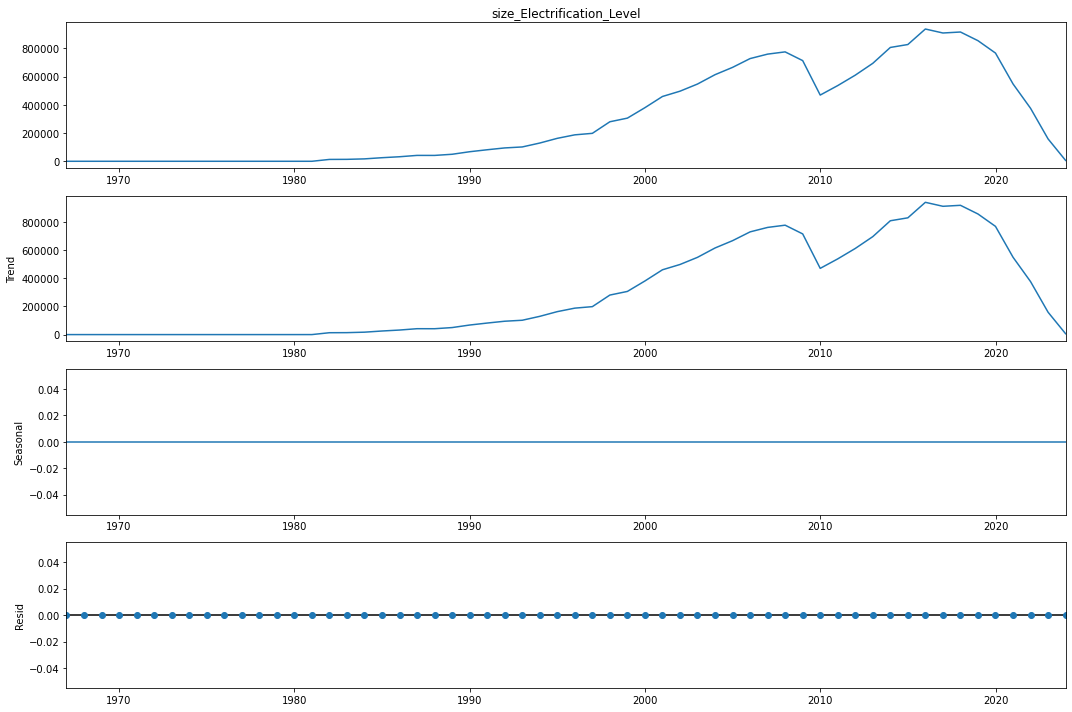

In [66]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y, model='additive')
# 모델 시각화
fig = model_series.plot()
plt.show()

In [73]:
import itertools

In [74]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [75]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [76]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [77]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41765D+01    |proj g|=  3.89021D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.890D-08   1.418D+01
  F =   14.176508305881358     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.06158D+01    |proj g|=  6.01440D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     26      1     0     0   1.490D-06   1.062D+01
  F =   10.615760888092167     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03701D+01    |proj g|=  8.49454D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54577D+01    |proj g|=  1.86020D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   1.860D-06   2.546D+01
  F =   25.457704004134278     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.35375D+00    |proj g|=  5.65976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   1.196D-06   9.354D+00
  F =   9.3537311825006260     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47993D+00    |proj g|=  5.04283D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21644D+01    |proj g|=  5.94014D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   5.940D-06   2.216D+01
  F =   22.164424852351910     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45262D+00    |proj g|=  2.39544D-01

At iterate    5    f=  7.36318D+00    |proj g|=  3.59869D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   1.967D-06   7.363D+00
  F =   7.3631751951438780     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.82715D+00    |proj g|=  6.83538D-01

At iterate   10    f=  9.76560D+00    |proj g|=  1.13763D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   1.007D-05   9.766D+00
  F =   9.7655995169729550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32469D+01    |proj g|=  3.70760D+00

At iterate    5    f=  9.83361D+00    |proj g|=  1.29930D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47864D+01    |proj g|=  6.28120D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   6.281D-06   2.479D+01
  F =   24.786434322089864     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57113D+00    |proj g|=  3.20392D-01

At iterate    5    f=  9.48327D+00    |proj g|=  4.49454D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   3.163D-06   9.483D+00
  F =   9.4832698728705083     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28423D+01    |proj g|=  6.55795D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   6.558D-06   2.284D+01
  F =   22.842283348950055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22107D+01    |proj g|=  6.46736D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   6.467D-06   2.221D+01
  F =   22.210743317331442     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.5

 This problem is unconstrained.
 This problem is unconstrained.


In [78]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

- **Likelihood (최대우도) : 특정 데이터가 모수로부터 추출되었을 가능도**
    - 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값)
    
    
- **AIC (Akaike Information Criterion) : 데이터에 대한 모델의 상대적 품질**
    - AIC = -2 ln(L) + 2k
    - 값이 낮을 수록 모형 적합도가 높은것을 의미
    
    
- **BIC (Bayes Information Criterion)**
    - BIC = -2 ln(L) log(n)p
    - 변수가 더 많은 경우, AIC에 더 많은 패널티를 부여해 계산
    
    
- **HQIC (Hannan Quinn Information Criterion)**
    - HQIC = -2 ln(L) + 2k ln(ln(n)) 

In [87]:
ARIMA_list.sort_values(by='AIC').head(2)

,Parameter,Seasonal,AIC
54,"(1, 1, 0)","(1, 1, 0, 12)",816.933637
62,"(1, 1, 1)","(1, 1, 0, 12)",817.981418


In [88]:
mod = tsa.statespace.SARIMAX(y,order=(1, 1, 0),seasonal_order=(1, 1, 0, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08492D+00    |proj g|=  1.29703D-01

At iterate    5    f=  6.99081D+00    |proj g|=  3.56112D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      7      1     0     0   1.157D-06   6.991D+00
  F =   6.9908072191538979     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:         size_Electrificati

 This problem is unconstrained.


- Order (p,d,q), Seasonal Order (P,D,Q,M)
    - p : AR에서의 p값 (p 구간 내 데이터 사이의 상관관계)
    - d : 차분
    - q : q MA PACF 편상관계수 q 값
    - P
    - D
    - Q
    - M
    
- Ljung - Box Test : 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검정
    - 귀무 : 데이터가 상관관계를 나타내지 않는다.
    - 대립 : 데이터가 상관관계를 나타낸다.
    - P.value(귀무가설이 참일 확률) < 0.05 (유의수준) -> 대립가설 참
    
- Jarque Bera Test : 왜도와 첨도가 정규분포와 일치하는지 가설검정
    - SARIMAX : 잔차의 분포가 정규분포 인가
    - 귀무 가설 : 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립 가설 : 해당 잔차(residual)는 정규분포와 일치하지 않는다.
    - P.value < 0.05 , 해당 잔차(residual)는 정규분포와 일치하지 않는다.

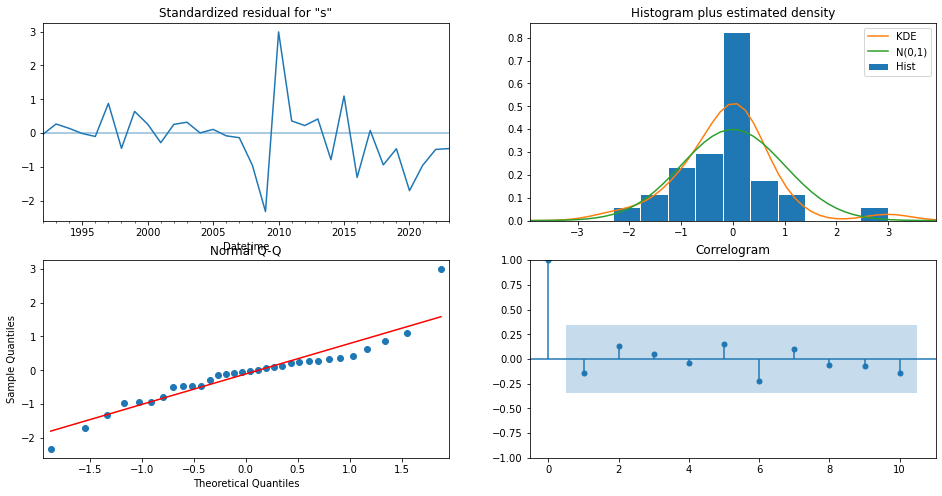

In [89]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [90]:
results.get_prediction()

In [102]:
y.head()

Datetime
1966-12-31    2
1967-12-31    0
1968-12-31    0
1969-12-31    0
1970-12-31    0
Freq: A-DEC, Name: size_Electrification_Level, dtype: int64

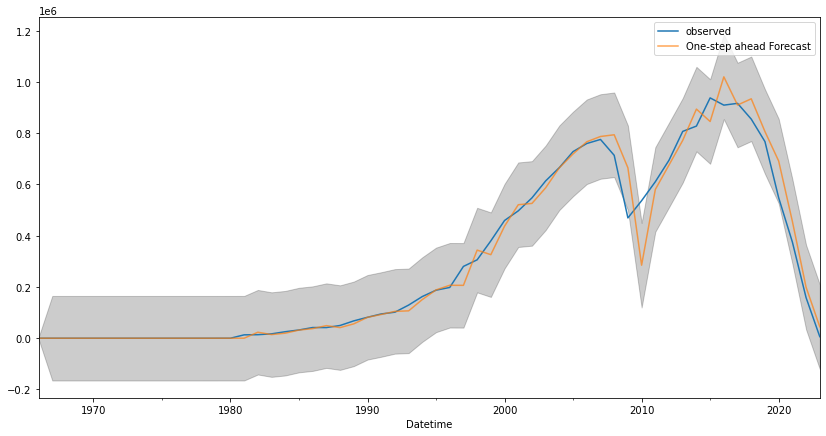

In [96]:
pred = results.get_prediction(start=pd.to_datetime('1966-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [97]:
pred = results.get_prediction(start=pd.to_datetime('1966-12-31'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,Datetime,predicted_mean
0,1966-12-31,0.000000e+00
1,1967-12-31,2.517089e+00
2,1968-12-31,-1.550992e+00
3,1969-12-31,-1.699016e-04
4,1970-12-31,-1.861167e-08
5,1971-12-31,-2.038794e-12
6,1972-12-31,-2.233373e-16
7,1973-12-31,-2.446522e-20
8,1974-12-31,-2.680014e-24
9,1975-12-31,-2.935789e-28


In [98]:
y_forecasted = pred.predicted_mean
y_truth = y['1966-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 3226193304.85


In [99]:
pred_uc = results.get_forecast(steps=50)

In [100]:
pred_uc.predicted_mean

2024-12-31   -9.004750e+04
2025-12-31   -1.898297e+05
2026-12-31   -2.442958e+05
2027-12-31   -2.606105e+05
2028-12-31   -2.710481e+05
2029-12-31   -2.571891e+05
2030-12-31   -2.624892e+05
2031-12-31   -2.747641e+05
2032-12-31   -3.573557e+05
2033-12-31   -6.203661e+05
2034-12-31   -5.628294e+05
2035-12-31   -4.964225e+05
2036-12-31   -4.180290e+05
2037-12-31   -3.089765e+05
2038-12-31   -2.921438e+05
2039-12-31   -1.842410e+05
2040-12-31   -2.157511e+05
2041-12-31   -2.112158e+05
2042-12-31   -2.753119e+05
2043-12-31   -3.656089e+05
2044-12-31   -5.876483e+05
2045-12-31   -7.598090e+05
2046-12-31   -9.814352e+05
2047-12-31   -1.137484e+06
2048-12-31   -1.236619e+06
2049-12-31   -1.339778e+06
2050-12-31   -1.395530e+06
2051-12-31   -1.413855e+06
2052-12-31   -1.424126e+06
2053-12-31   -1.410241e+06
2054-12-31   -1.414762e+06
2055-12-31   -1.425956e+06
2056-12-31   -1.506549e+06
2057-12-31   -1.770935e+06
2058-12-31   -1.709324e+06
2059-12-31   -1.639670e+06
2060-12-31   -1.558685e+06
2

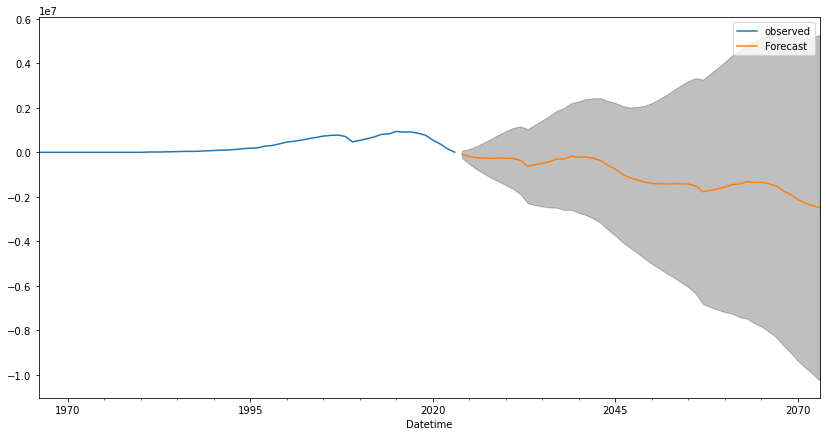

In [103]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

In [104]:
print('Done')

Done


In [41]:
##################        메모        ##################

In [42]:
# 다중 선형 회귀????
# 가치투자 - 실질적인 시장의 과거 반증을 봄으로써 특정 회사의 가치가 상승할 어쩌구저쩌구

In [43]:
# 지금 데이터 일반차량 + 전기차 통합 데이터이기 때문에
# 내연기관과 전기차량의 수요에 대한 시장의 반증을 볼수 있을까
# 앞으로의 Electrification Level 에 따른 추후 시장 demand 예측. 각각 타입에 따라 증감이 있을까
# 선형 회귀
# Y 수량, X는 기간 ?

In [44]:
# 시계열 (X -> Model Year) 1966 ~ 2023
# 데이터 불균형이 심함?
# 전처리 우선 해보기 : 컬럼 2개 Year(연속형), ICE(연속형), Strong HEV(연속형) .... 
# 컬럼이 2개면 안되지 컬럼이 7개여야함
# 6주차 참고중이엇음... + 7, 10, 11 주차